<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
دایی موند
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    به اولین تمرین از فصل‌های مدل‌سازی کالج خوش‌آمدید 😊🎉
    <br>
    هدف ما در این مسئله این است که قیمت الماس‌ها را بر اساس تعدادی از ویژگی‌های آن‌ها پیش‌بینی کنیم.
    برای حل این مسئله به سراغ الگوریتم رگرسیون خطی خواهیم رفت.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ آموزشی‌ای که در اختیار داریم شامل ۱۰ ستون است که در جدول زیر، توضیحات هر کدام از ستون‌ها آورده شده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>carat</code>|وزن الماس به معیار قیراط|
|<code>cut</code>|کیفیت تراش‌خوردگی الماس|
|<code>color</code>|رنگ الماس از J(بدترین) تا D (بهترین)|
|<code>clarity</code>|معیار شفافیت الماس (از چپ به راست از بدترین به بهترین: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
|<code>x</code>|طول الماس به میلی‌متر|
|<code>y</code>|عرض الماس به میلی‌متر|
|<code>z</code>|عمق الماس به میلی‌متر|
|<code>depth</code>|عمق درصدی که برابر است با z / mean(x,y)|
|<code>table</code>|عرض عریض‌ترین نقطه بالایی الماس|
|<code>price</code>|قیمت الماس|

</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>diamonds_train.csv</code> و نمونه‌های آزمون که باید قیمت آن‌ها را پیش‌بینی کنید در فایل <code>diamonds_test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزشی را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [2]:
train = pd.read_csv('../data/diamonds_train.csv')
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
test = pd.read_csv('../data/diamonds_test.csv') # TO-DO
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59
1,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
2,1.55,Premium,I,VS1,58.2,60.0,7.69,7.59,4.45
3,0.46,Good,F,IF,56.2,61.0,5.16,5.24,2.92
4,1.10,Very Good,F,VS2,60.6,58.0,6.67,6.77,4.07


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [4]:
# Do some preprocessing!

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    3940 non-null   float64
 1   cut      3940 non-null   object 
 2   color    3940 non-null   object 
 3   clarity  3940 non-null   object 
 4   depth    3940 non-null   float64
 5   table    3940 non-null   float64
 6   x        3940 non-null   float64
 7   y        3940 non-null   float64
 8   z        3940 non-null   float64
dtypes: float64(6), object(3)
memory usage: 277.2+ KB


## 

In [7]:
train.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
depth,0.027734,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


<AxesSubplot: >

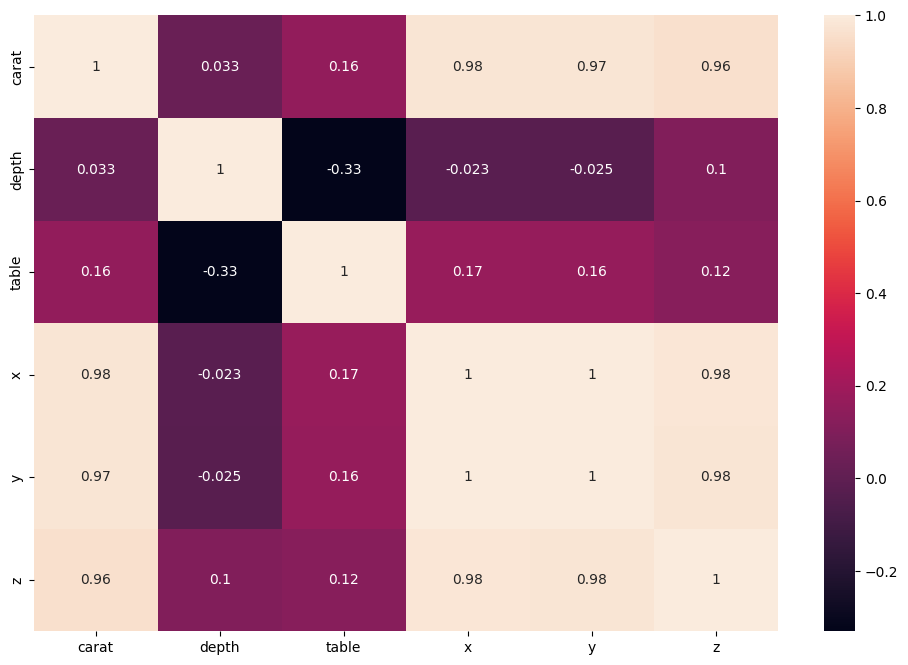

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(test.corr(), annot=True)

## carat has skewness

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='carat', ylabel='Count'>

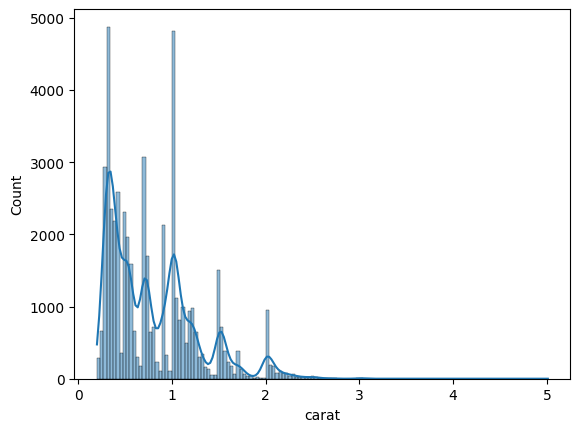

In [10]:
sns.histplot(train.carat, kde=True)

<AxesSubplot: xlabel='carat', ylabel='Count'>

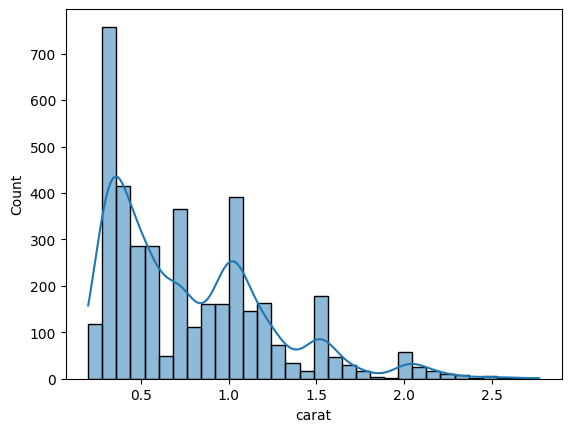

In [11]:
sns.histplot(test.carat, kde=True)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler_carat = StandardScaler()
scaled_train_carat = scaler_carat.fit_transform(train[['carat']])

In [14]:
scaled_test_carat = scaler_carat.transform(test[['carat']])

In [15]:
train['carat'] = scaled_train_carat
test['carat'] = scaled_test_carat

<AxesSubplot: xlabel='carat', ylabel='Count'>

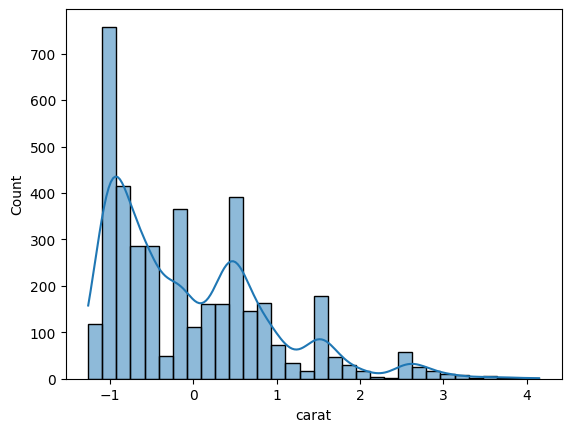

In [16]:
sns.histplot(test.carat, kde=True)

In [17]:
train.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

<AxesSubplot: xlabel='cut', ylabel='Count'>

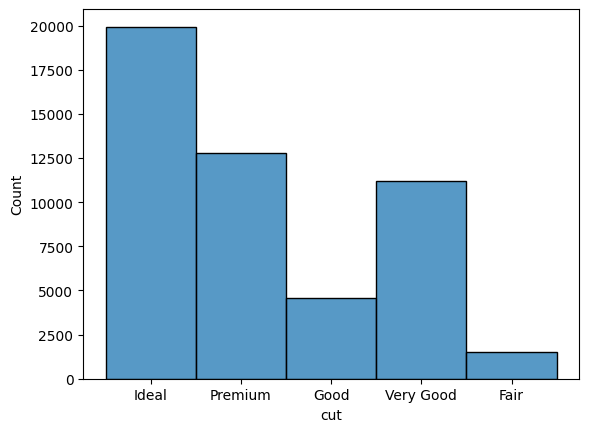

In [18]:
sns.histplot(train.cut)

<AxesSubplot: xlabel='cut', ylabel='Count'>

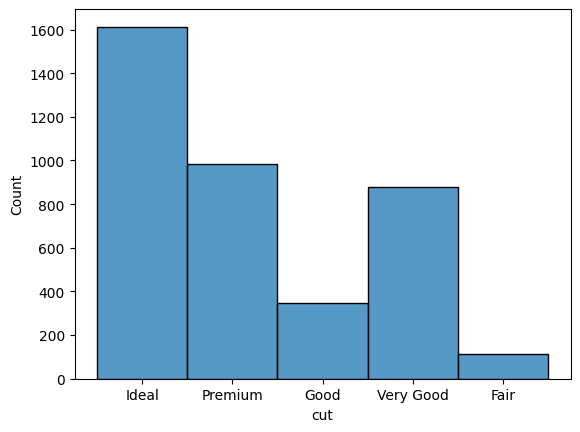

In [19]:
sns.histplot(test.cut)

In [20]:
maping_cut = {'Ideal':1, 'Premium':.8, 'Very Good':.6, 'Good':.4, 'Fair':.2}

In [21]:
train.cut = train.cut.map(maping_cut)

In [22]:
test.cut = test.cut.map(maping_cut)

In [23]:
train.cut

0        1.0
1        0.8
2        0.4
3        0.8
4        0.4
        ... 
49995    1.0
49996    0.4
49997    0.6
49998    0.8
49999    1.0
Name: cut, Length: 50000, dtype: float64

In [24]:
test.cut

0       1.0
1       0.8
2       0.8
3       0.4
4       0.6
       ... 
3935    0.8
3936    0.6
3937    0.8
3938    1.0
3939    1.0
Name: cut, Length: 3940, dtype: float64

In [25]:
scaler_cut = StandardScaler()
train.cut = scaler_cut.fit_transform(train[['cut']])
test.cut = scaler_cut.transform(test[['cut']])

<AxesSubplot: xlabel='cut', ylabel='Count'>

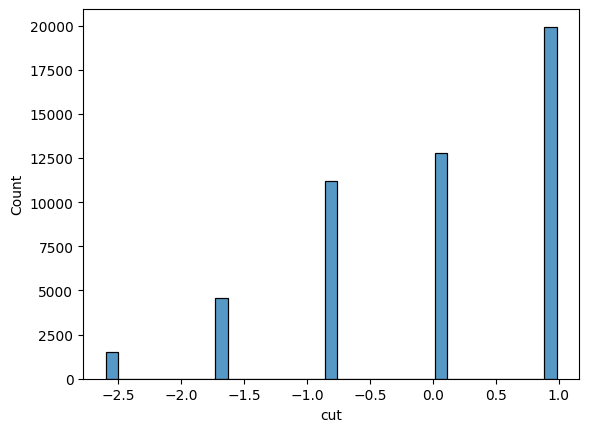

In [26]:
sns.histplot(train.cut)

<AxesSubplot: xlabel='color', ylabel='Count'>

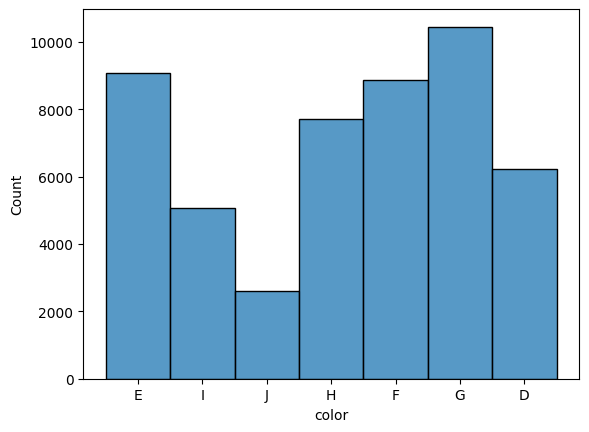

In [27]:
sns.histplot(train.color)

<AxesSubplot: xlabel='color', ylabel='Count'>

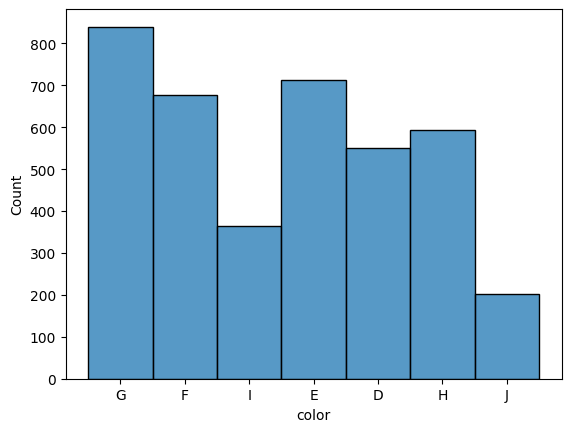

In [28]:
sns.histplot(test.color)

In [29]:
dummies = pd.get_dummies(train.color)
train = pd.concat([train, dummies], axis=1)

In [30]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,D,E,F,G,H,I,J
0,-1.198405,0.982622,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,-1.240495,0.087131,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,-1.198405,-1.703850,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,-1.072134,0.087131,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,-1.030043,-1.703850,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1


In [31]:
dummies = pd.get_dummies(test.color)
test = pd.concat([test, dummies], axis=1)

In [32]:
train.drop(columns='color', inplace=True)
test.drop(columns='color', inplace=True)

## distriburion of train and test not balanced in "clarity" feature

<AxesSubplot: xlabel='clarity', ylabel='Count'>

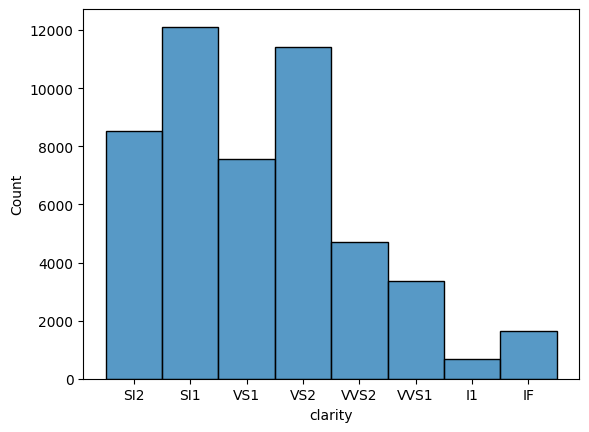

In [33]:
sns.histplot(train.clarity)

<AxesSubplot: xlabel='clarity', ylabel='Count'>

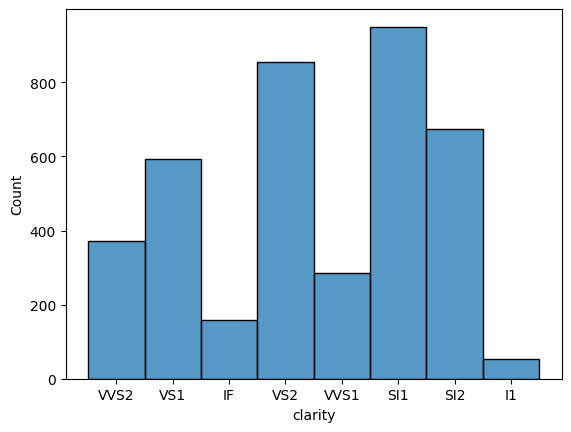

In [34]:
sns.histplot(test.clarity)

In [35]:
clarity_map = {
    'I1': 1,     # Worst clarity
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8      # Best clarity
}
train.clarity = train.clarity.map(clarity_map)
test.clarity = test.clarity.map(clarity_map)

In [36]:
scaler_clarity = StandardScaler()
train.clarity = scaler_clarity.fit_transform(train[['clarity']])
test.clarity = scaler_clarity.transform(test[['clarity']])

<AxesSubplot: xlabel='clarity', ylabel='Count'>

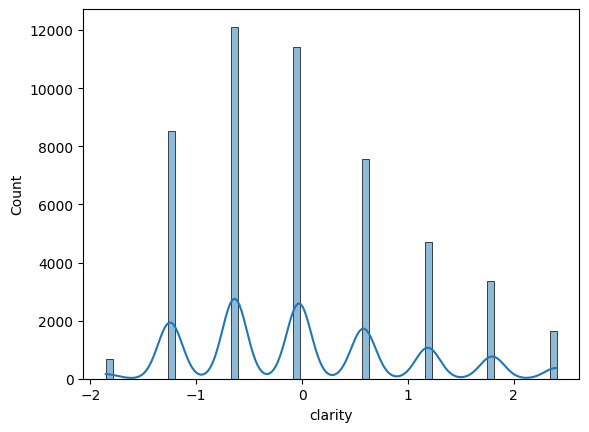

In [37]:
sns.histplot(train.clarity, kde=True)


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  float64
 2   clarity  50000 non-null  float64
 3   depth    50000 non-null  float64
 4   table    50000 non-null  float64
 5   price    50000 non-null  int64  
 6   x        50000 non-null  float64
 7   y        50000 non-null  float64
 8   z        50000 non-null  float64
 9   D        50000 non-null  uint8  
 10  E        50000 non-null  uint8  
 11  F        50000 non-null  uint8  
 12  G        50000 non-null  uint8  
 13  H        50000 non-null  uint8  
 14  I        50000 non-null  uint8  
 15  J        50000 non-null  uint8  
dtypes: float64(8), int64(1), uint8(7)
memory usage: 3.8 MB


## Delete columns with strong correlation together 

In [39]:
train = train.drop(columns=['x', 'y', 'z'])
train

,carat,cut,clarity,depth,table,price,D,E,F,G,H,I,J
0,-1.198405,0.982622,-1.245926,61.5,55.0,326,0,1,0,0,0,0,0
1,-1.240495,0.087131,-0.637475,59.8,61.0,326,0,1,0,0,0,0,0
2,-1.198405,-1.703850,0.579429,56.9,65.0,327,0,1,0,0,0,0,0
3,-1.072134,0.087131,-0.029023,62.4,58.0,334,0,0,0,0,0,1,0
4,-1.030043,-1.703850,-1.245926,63.3,58.0,335,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.167191,0.982622,-0.637475,60.8,57.0,2757,1,0,0,0,0,0,0
49996,-0.167191,-1.703850,-0.637475,63.1,55.0,2757,1,0,0,0,0,0,0
49997,-0.209281,-0.808359,-0.637475,62.8,60.0,2757,1,0,0,0,0,0,0
49998,0.127442,0.087131,-1.245926,61.0,58.0,2757,0,0,0,0,1,0,0


In [40]:
test = test.drop(columns=['x', 'y', 'z'])
test

,carat,cut,clarity,depth,table,D,E,F,G,H,I,J
0,-0.146146,0.982622,1.187880,61.9,55.0,0,0,0,1,0,0,0
1,-0.398688,0.087131,1.187880,59.7,58.0,0,0,1,0,0,0,0
2,1.579559,0.087131,0.579429,58.2,60.0,0,0,0,0,0,1,0
3,-0.714366,-1.703850,2.404783,56.2,61.0,0,0,1,0,0,0,0
4,0.632526,-0.808359,-0.029023,60.6,58.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3935,1.642694,0.087131,0.579429,61.1,59.0,0,0,0,0,0,1,0
3936,0.422074,-0.808359,-0.637475,63.1,59.0,0,0,1,0,0,0,0
3937,0.695661,0.087131,0.579429,58.9,58.0,0,0,0,0,1,0,0
3938,1.495378,0.982622,-0.029023,62.8,56.0,0,1,0,0,0,0,0


<AxesSubplot: xlabel='depth', ylabel='Count'>

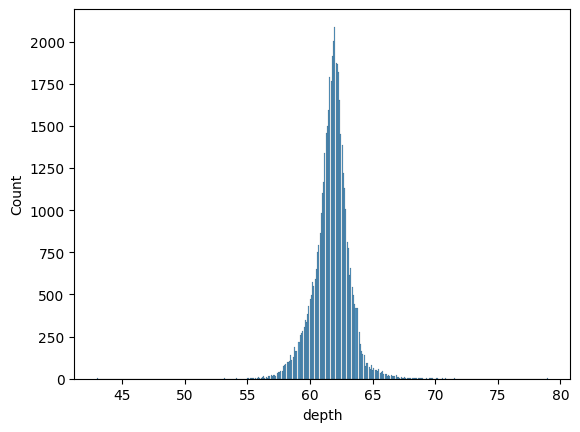

In [41]:
sns.histplot(train.depth)

<AxesSubplot: xlabel='depth', ylabel='Count'>

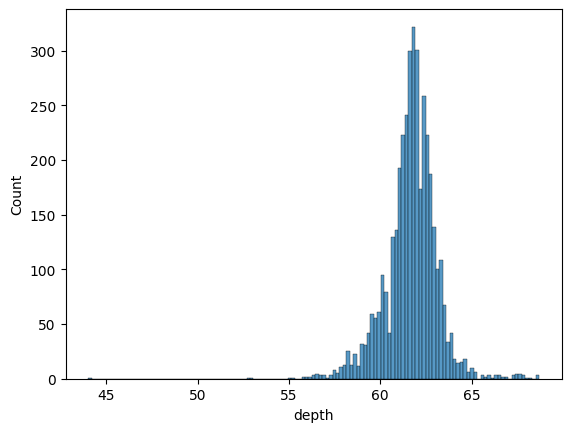

In [42]:
sns.histplot(test.depth)

<AxesSubplot: xlabel='table', ylabel='Count'>

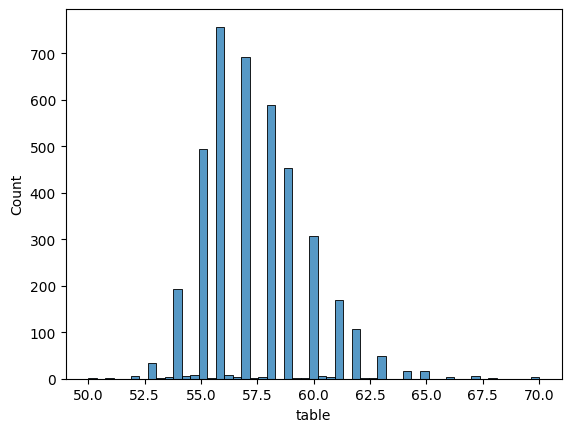

In [43]:
sns.histplot(test.table)

<AxesSubplot: xlabel='table', ylabel='Count'>

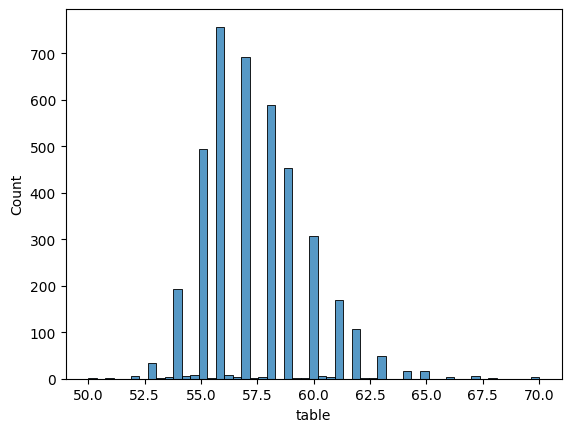

In [44]:
sns.histplot(test.table)

In [45]:
scaler_depth = StandardScaler()
train.depth = scaler_depth.fit_transform(train[['depth']])
test.depth = scaler_depth.transform(test[['depth']])

In [46]:
scaler_table = StandardScaler()
train.table = scaler_table.fit_transform(train[['table']])
test.table = scaler_table.transform(test[['table']])

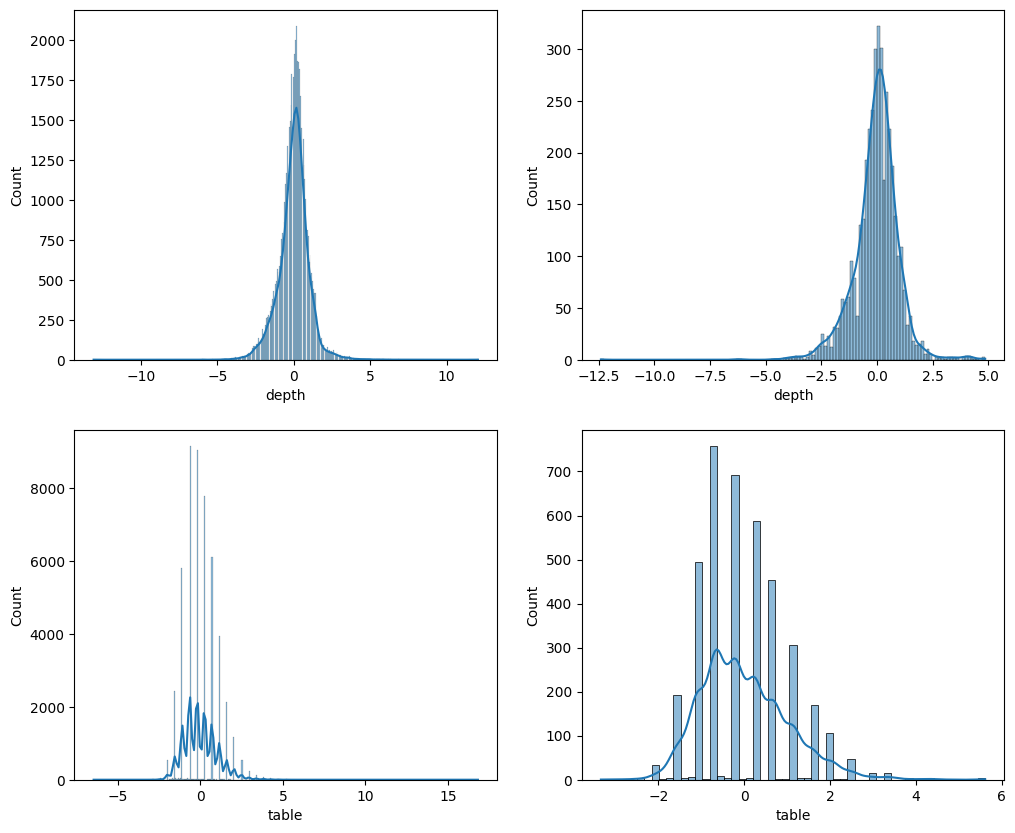

In [47]:
fig, axis = plt.subplots(2, 2, figsize = (12, 10))

sns.histplot(train.depth, kde=True, ax= axis[0, 0])
sns.histplot(test.depth, kde=True, ax= axis[0, 1])
sns.histplot(train.table, kde=True, ax= axis[1, 0])
sns.histplot(test.table, kde=True, ax= axis[1, 1])

plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده‌ها را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    الگوریتم <code>LinearRegression</code> نیز در کتابخانه‌ی <code>scikit-learn</code> به‌خوبی پیاده‌سازی شده و می‌توانیم از آن جهت اجرای الگوریتم <i>رگرسیون خطی</i> بر روی داده‌های خود کمک بگیریم.
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در سلول پایین با استفاده از کتابخانه <code>scikit-learn</code> مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    <b>حتما باید از مدل رگرسیون خطی یعنی <code>LinearRegression</code> استفاده کنید.</b>
</font>
</p>

In [48]:
from sklearn.linear_model import LinearRegression

# model = None # To-Do
model = LinearRegression()

In [49]:
train.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'D', 'E', 'F',
       'G', 'H', 'I', 'J'],
      dtype='object')

In [50]:
train_values = train.drop(columns='price')
train_target = train.price

In [51]:
model.fit(train_values, train_target)

LinearRegression()

In [52]:
print(model.coef_,'\n', model.intercept_)

[ 4.18446630e+03  1.34360545e+02  8.41730416e+02 -7.51438285e+01
 -5.55564951e+01 -1.04448607e+16 -1.04448607e+16 -1.04448607e+16
 -1.04448607e+16 -1.04448607e+16 -1.04448607e+16 -1.04448607e+16] 
 1.0444860726090382e+16


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

In [53]:
test.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'D', 'E', 'F', 'G', 'H',
       'I', 'J'],
      dtype='object')

In [54]:
# test_values = test.drop(columns='price')
# test_target = test.price

In [55]:
train_predict = model.predict(train_values)

In [56]:
from sklearn.metrics import r2_score

# To-Do
r2_score(train_predict, train_target)

0.8970216858138933

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>80</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدل‌سازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول زیر آماده کنید.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>price</code>|قیمت پیش‌بینی‌شده برای الماس|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
توجه داشته باشید که:
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium; margin-right:48px">
<font face="vazir" size=3>
    ۱. نام دیتافریم پاسخ شما حتماً باید <code>submission</code> باشد، در غیر این‌صورت سامانه‌ی داوری نمی‌تواند تلاش شما را ارزیابی کند.
    <br>
    ۲. این دیتافریم تنها شامل یک ستون با نام <code>price</code> بوده و شامل ۳۹۴۰ ردیف است.
    <br>
    ۳. ترتیب ردیف‌های دیتافریم باید دقیقاً مطابق با نمونه‌های آزمون باشد. یعنی به‌عنوان مثال اولین ردیف شما باید پیش‌بینی مدل‌تان برای نمونه‌ی آزمون اول باشد.
</font>
</p>

In [58]:
# predict test samples
# submission = None # To-Do
price_pred = model.predict(test)

In [59]:
submission = pd.DataFrame()

In [60]:
submission['price'] = price_pred
submission

,price
0,4596.0
1,3664.0
2,10392.0
3,3236.0
4,6786.0
...,...
3935,10530.0
3936,5238.0
3937,7090.0
3938,10708.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [61]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
joblib.dump(model, 'model')
file_names = ['diamond.ipynb', 'submission.csv', 'model']
compress(file_names)

File Paths:
['diamond.ipynb', 'submission.csv', 'model']


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>راهنمایی</b>
</font>
</h4>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ۱. ستون‌های دسته‌ای (<i>categorical</i>) دیتافریم را می‌توانید <code>labelEncode</code> کنید.
    <br>
    ۲. فراموش نکنید که مراحل پیش‌پردازش خود را بر روی نمونه‌های آزمون نیز اعمال کنید.
</font>
</p>